<a href="https://colab.research.google.com/github/chaitu1904/Exploratory-Data-Analysis-EDA-on-Retail-Sales-Data/blob/main/task1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,

In [2]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
pd.concat([df.head(), df.tail()])

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['gender'] = df['gender'].astype('category')
df['product_category'] = df['product_category'].astype('category')

In [9]:
df.dtypes

,0
transaction_id,int64
date,datetime64[ns]
customer_id,object
gender,category
age,int64
product_category,category
quantity,int64
price_per_unit,int64
total_amount,int64


In [10]:
df.drop('customer_id', axis=1, inplace=True)
temp_df = df.copy()
temp_df

,transaction_id,date,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,Male,34,Beauty,3,50,150
1,2,2023-02-27,Female,26,Clothing,2,500,1000
2,3,2023-01-13,Male,50,Electronics,1,30,30
3,4,2023-05-21,Male,37,Clothing,1,500,500
4,5,2023-05-06,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
995,996,2023-05-16,Male,62,Clothing,1,50,50
996,997,2023-11-17,Male,52,Beauty,3,30,90
997,998,2023-10-29,Female,23,Beauty,4,25,100
998,999,2023-12-05,Female,36,Electronics,3,50,150


In [11]:
temp_df.dtypes

,0
transaction_id,int64
date,datetime64[ns]
gender,category
age,int64
product_category,category
quantity,int64
price_per_unit,int64
total_amount,int64


In [12]:
temp_df['date'] = pd.to_datetime(temp_df['date'])
temp_df.set_index('date', inplace=True)

**Exploratory Data** **Analysis**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='date'>

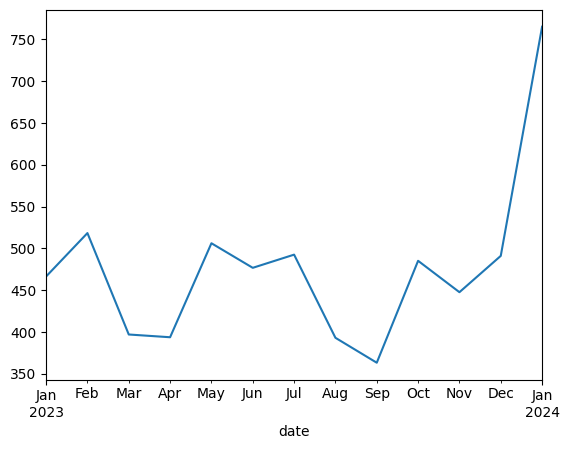

In [14]:
# average montly sales
monthly_window = temp_df['total_amount'].resample('M').mean()
monthly_window.plot()

<Axes: xlabel='date'>

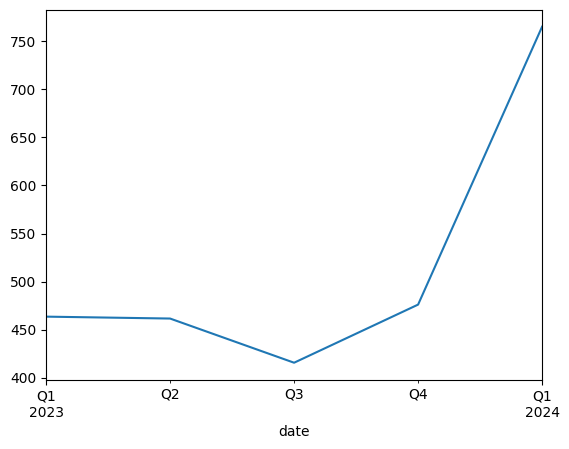

In [15]:
# average quarterly sales
quarterly_window = temp_df['total_amount'].resample('Q').mean()
quarterly_window.plot()

**Feature** **Engineering**

In [16]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['gender'] = df['gender'].cat.codes
df['product_category'] = df['product_category'].cat.codes

**Model Training**

In [17]:
# Prepare the data for XGBoost
X = df[['transaction_id', 'month', 'year', 'day_of_week', 'day_of_month', 'gender', 'age', 'product_category', 'total_amount', 'price_per_unit', 'quantity']]
y = df['total_amount']
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

**Model Evaluation**

In [18]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = best_model.score(X_test, y_test)

mae = np.mean(np.abs(y_test - y_pred))

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"RMSE: {rmse}")
print(f"R-Score: {r2}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


RMSE: 0.00010391278362575736
R-Score: 1.0
MAE: 6.924629211425781e-05
MAPE: 5.8185577392578125e-05


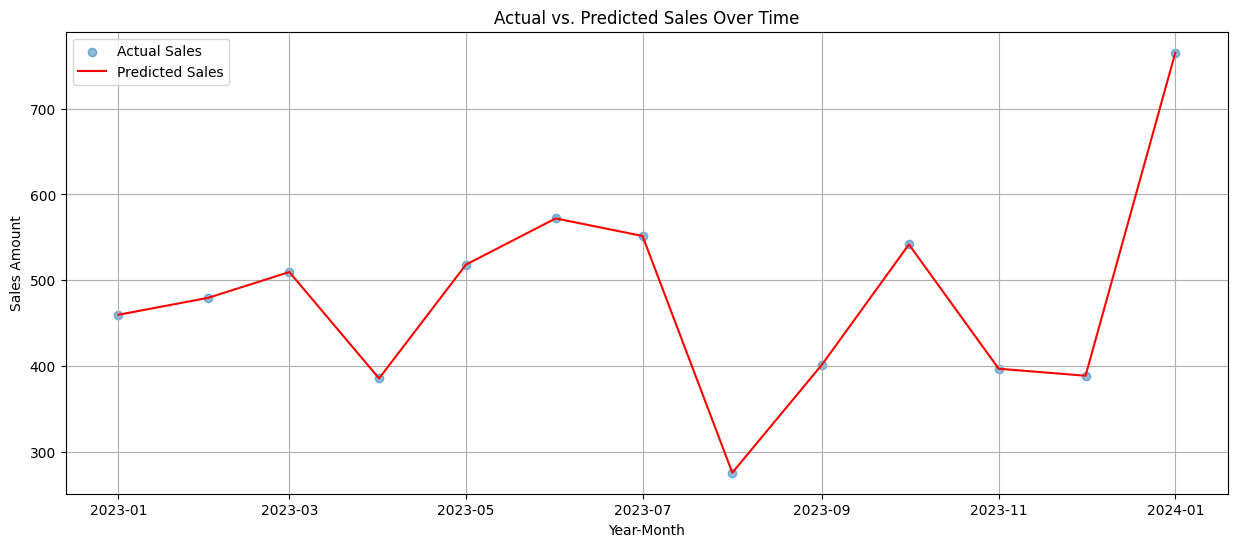

In [19]:
plot_df = pd.DataFrame({'Year-Month': pd.to_datetime(X_test['year'].astype(str) + '-' + X_test['month'].astype(str), format='%Y-%m'),
                       'Actual': y_test,
                       'Predicted': y_pred})

plot_df = plot_df.groupby('Year-Month').mean()

plt.figure(figsize=(15, 6))
plt.scatter(plot_df.index, plot_df['Actual'], label='Actual Sales', marker='o', alpha=0.5)  # Scatter plot for actual
plt.plot(plot_df.index, plot_df['Predicted'], label='Predicted Sales', linestyle='-', color='red')  # Line plot for predicted
plt.xlabel('Year-Month')
plt.ylabel('Sales Amount')
plt.title('Actual vs. Predicted Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()


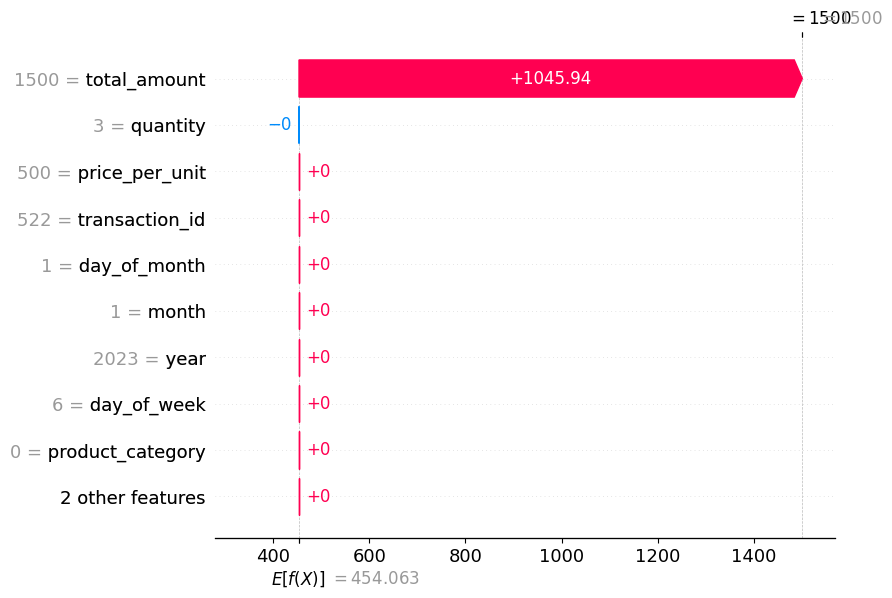

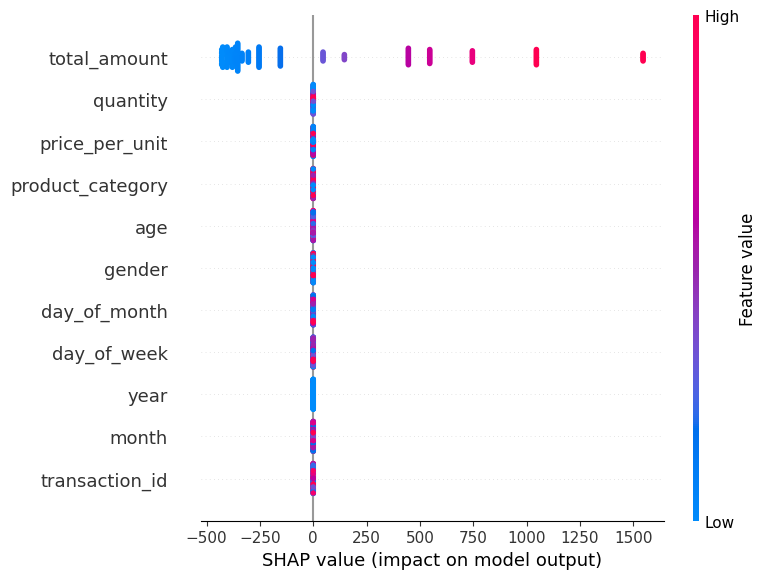

In [20]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

# Plot SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])

# Summary plot of SHAP values for all predictions
shap.summary_plot(shap_values, X_test)